In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2025-04-21 17:03:10.476800: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 17:03:10.486283: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745244190.497820   21126 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745244190.501119   21126 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-21 17:03:10.512188: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


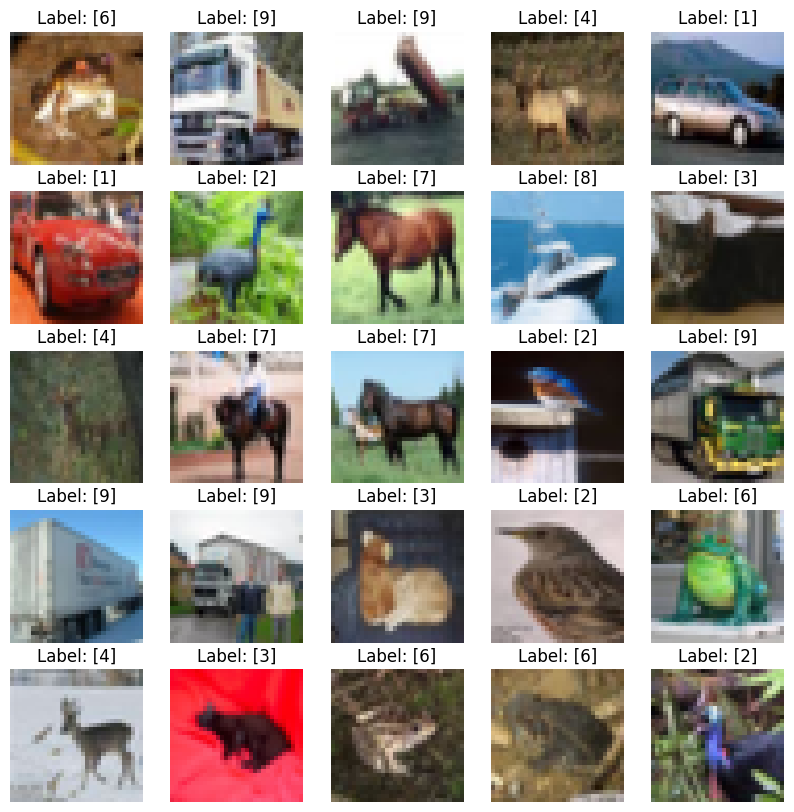

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
    
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')

print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

In [ ]:
import keras
from keras import models, layers



def AlexNet(input_shape=(227, 227, 3), n_classes = 200):
  model = models.Sequential()
  
  model.add(layers.Input(shape=input_shape))
  model.add(layers.Resizing(227, 227))
  model.add(layers.RandomColorJitter(
    value_range=(0, 1),
    brightness_factor=0.2,
    contrast_factor=0.2,
    saturation_factor=0.2,
    hue_factor=0.2
  ))
  model.add(layers.RandomFlip(
    mode="horizontal_and_vertical"
  ))
  
  model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  
  model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  
  model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  
  model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  
  model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  
  model.add(layers.GlobalAveragePooling2D())
  
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(n_classes, activation='softmax'))
  
  return model

In [ ]:
from keras import optimizers

epochs = 50

initial_learning_rate = 1e-3
final_learning_rate = 1e-6
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate) ** (1 / epochs)
steps_per_epoch = len(x_train)

learning_rate = optimizers.schedules.ExponentialDecay(
  initial_learning_rate=initial_learning_rate,
  decay_steps=steps_per_epoch,
  decay_rate=learning_rate_decay_factor
)

model = AlexNet(input_shape=(32, 32, 3), n_classes=10)
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

I0000 00:00:1745244194.093524   21126 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_color_jitter             │ (None, 227, 227, 3)    │             0 │
│ (RandomColorJitter)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 23, 23, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 9, 9, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 21,627,658 (82.50 MB)

 Trainable params: 21,624,906 (82.49 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [5]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50


I0000 00:00:1745244197.266581   21242 service.cc:148] XLA service 0x7fafc8004480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745244197.266615   21242 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-04-21 17:03:17.314018: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745244197.605405   21242 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-21 17:03:18.893559: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4689', 60 bytes spill stores, 64 bytes spill loads

2025-04-21 17:03:19.217638: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4247', 76 bytes

  13/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.0954 - loss: 4.2097

I0000 00:00:1745244204.411747   21242 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2050 - loss: 2.2805

2025-04-21 17:03:41.010336: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_347_0', 232 bytes spill stores, 232 bytes spill loads

2025-04-21 17:03:41.096991: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_347', 196 bytes spill stores, 196 bytes spill loads

2025-04-21 17:03:41.098696: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_354', 104 bytes spill stores, 104 bytes spill loads

2025-04-21 17:03:41.141764: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_354', 412 bytes spill stores, 412 bytes spill loads

2025-04-21 17:03:43.695965: I external/local_xla/xla/s

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.2051 - loss: 2.2802 - val_accuracy: 0.2540 - val_loss: 2.0968
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.3675 - loss: 1.7830 - val_accuracy: 0.2573 - val_loss: 2.4431
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.4442 - loss: 1.5960 - val_accuracy: 0.4312 - val_loss: 1.6059
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.4957 - loss: 1.4505 - val_accuracy: 0.4675 - val_loss: 1.5473
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5444 - loss: 1.3350 - val_accuracy: 0.5313 - val_loss: 1.3282
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.5768 - loss: 1.2288 - val_accuracy: 0.4959 - val_loss: 1.4701
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6060 - loss: 1.1479 - val_accuracy: 0.5285 - val_loss: 1.3419
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.6314 - loss: 1.08

In [6]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6925 - loss: 1.4882


[1.5231800079345703, 0.6886000037193298]

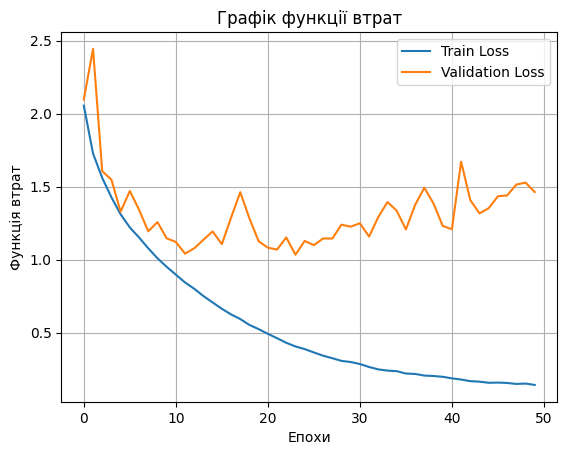

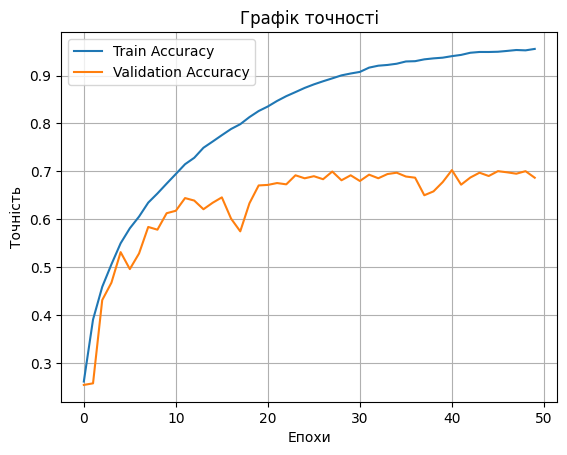

In [7]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Епохи')
plt.ylabel('Функція втрат')
plt.title('Графік функції втрат')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.title('Графік точності')
plt.legend()
plt.grid()
plt.show()

In [ ]:
predictions = model.predict(x_test).argmax(axis=1)

predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([6, 8, 0, ..., 5, 1, 7])

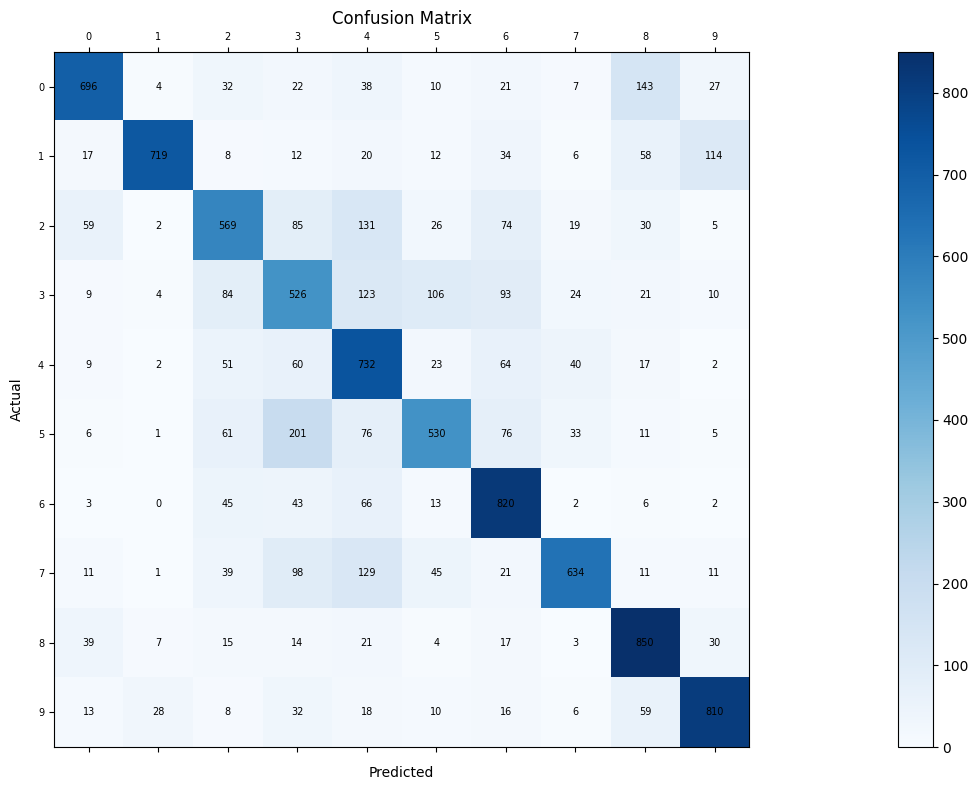

In [10]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(30, 8))
cax = ax.matshow(conf_matrix, cmap="Blues")

plt.colorbar(cax)

class_labels=range(10)

ax.set_xticks(range(len(class_labels)))
ax.set_yticks(range(len(class_labels)))
ax.set_xticklabels(class_labels, fontsize=7)
ax.set_yticklabels(class_labels, fontsize=7)

plt.title("Confusion Matrix", pad=20)
plt.xlabel("Predicted", labelpad=10)
plt.ylabel("Actual", labelpad=10)

for (i, j), value in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{value}', ha='center', va='center', color='black', fontsize=7)

plt.tight_layout()
plt.show()